<a href="https://colab.research.google.com/github/yeeeeeun/smart_farm/blob/main/%EC%96%91%EC%95%A1_%EC%B6%94%EC%B2%9C_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리 (파일 합치기)

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os

directory = '/content/drive/MyDrive/루켄_프로젝트/농촌진흥청_최적환경설정_칼럼추가'

dfs = []

for filename in os.listdir(directory):
    if filename.endswith(".xlsx") or filename.endswith(".xls"):
        filepath = os.path.join(directory, filename)
        df = pd.read_excel(filepath)
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.to_excel('combined_file.xlsx', index=False)

In [ ]:
import pandas as pd
combined_df = pd.read_excel('combined_file.xlsx')

combined_df.to_csv('f_combined_file.csv', index=False)


In [ ]:
import pandas as pd

df = pd.read_csv('f_combined_file.csv')

print(df.head())


  누적일사량(J/㎠/day) 외기기온   (℃)    생산량  초장  (㎝)  엽수  (개)  관부직경(㎜)  일일 평균온도(℃)  \
0      970~1,630   9.0~26.2  178.0     36.6      7.3     16.0        15.8   
1      970~1,630   9.0~26.2   96.0     33.3      7.8     15.3        16.2   
2      970~1,630   9.0~26.2   29.0     25.6      6.2     13.5        16.1   
3      970~1,630    4.3~9.0   96.0     29.2      6.8     18.2        14.3   
4      970~1,630    4.3~9.0   23.0     25.1     10.2     16.6        14.5   

   주간 평균온도(℃)  야간 평균온도(℃)  새벽온도(℃) 배지온도(℃) 주간 평균습도(%) 주간 평균잔존CO₂(ppm)  \
0        21.0        12.1     12.7       -       63.8             423   
1        19.8        13.1     12.5    15.5       74.1             522   
2        21.5        11.6     10.3    16.1       75.5             407   
3        18.2        11.7     11.3    13.7       70.0             572   
4        20.2        10.0      8.9    14.8       67.6             377   

  급액 EC(dS/m) 급액 pH 1회 급액량(㏄/day)       생육단계  정식후 평균 1화방 출뢰일수  
0        1.34  5.70           211 

In [ ]:
df.columns

Index(['누적일사량(J/㎠/day)', '외기기온   (℃)', '생산량', '초장  (㎝)', '엽수  (개)', '관부직경(㎜)',
       '일일 평균온도(℃)', '주간 평균온도(℃)', '야간 평균온도(℃)', '새벽온도(℃)', '배지온도(℃)',
       '주간 평균습도(%)', '주간 평균잔존CO₂(ppm)', '급액 EC(dS/m)', '급액 pH',
       '1회 급액량(㏄/day)', '생육단계', '정식후 평균 1화방 출뢰일수'],
      dtype='object')

In [ ]:

df.columns = df.columns.str.strip()

print(df.columns)


Index(['누적일사량(J/㎠/day)', '외기기온   (℃)', '생산량', '초장  (㎝)', '엽수  (개)', '관부직경(㎜)',
       '일일 평균온도(℃)', '주간 평균온도(℃)', '야간 평균온도(℃)', '새벽온도(℃)', '배지온도(℃)',
       '주간 평균습도(%)', '주간 평균잔존CO₂(ppm)', '급액 EC(dS/m)', '급액 pH',
       '1회 급액량(㏄/day)', '생육단계', '정식후 평균 1화방 출뢰일수'],
      dtype='object')


## 데이터 전처리 (파일 이름 바꾸기 + 필요 칼럼 추출)

In [ ]:
new_df = df[['초장\xa0\xa0(㎝)', '엽수\xa0\xa0(개)', '관부직경(㎜)','일일 평균온도(℃)', '급액 EC(dS/m)', '급액 pH',
       '1회 급액량(㏄/day)', '생육단계']]

In [ ]:
new_df.rename(columns={
    '초장\xa0\xa0(㎝)': 'stem_length',
    '엽수\xa0\xa0(개)': 'leaf_cnt',
    '관부직경(㎜)': 'stem_thick',
    '일일 평균온도(℃)': 'ti_value',
    '급액 EC(dS/m)': 'ec_value',
    '급액 pH': 'ph_value',
    '1회 급액량(㏄/day)': 'amount_value',
    '생육단계' : 'growth_state'
}, inplace=True)

In [ ]:
new_df.info()

In [ ]:
new_df.head()

## 데이터 전처리 (null data "-" + 형변환)

In [ ]:
new_df.isna().sum()

stem_length     0
leaf_cnt        0
stem_thick      0
ti_value        0
ec_value        0
ph_value        0
amount_value    0
growth_state    0
dtype: int64

In [ ]:
import numpy as np
new_df.replace('-', np.nan, inplace = True)

In [ ]:
new_df.isna().sum()

stem_length      0
leaf_cnt         0
stem_thick       0
ti_value         0
ec_value         8
ph_value         8
amount_value    14
growth_state     0
dtype: int64

In [ ]:
new_df.dropna(axis=0, inplace=True)
new_df.isna().sum()

stem_length     0
leaf_cnt        0
stem_thick      0
ti_value        0
ec_value        0
ph_value        0
amount_value    0
growth_state    0
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 195
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stem_length   180 non-null    float64
 1   leaf_cnt      180 non-null    float64
 2   stem_thick    180 non-null    float64
 3   ti_value      180 non-null    float64
 4   ec_value      180 non-null    object 
 5   ph_value      180 non-null    object 
 6   amount_value  180 non-null    object 
 7   growth_state  180 non-null    object 
dtypes: float64(4), object(4)
memory usage: 12.7+ KB


In [ ]:

new_df['ec_value'] = new_df['ec_value'].astype('float')
new_df['ph_value'] = new_df['ph_value'].astype('float')
new_df['amount_value'] = new_df['amount_value'].astype('float')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 195
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stem_length   180 non-null    float64
 1   leaf_cnt      180 non-null    float64
 2   stem_thick    180 non-null    float64
 3   ti_value      180 non-null    float64
 4   ec_value      180 non-null    float64
 5   ph_value      180 non-null    float64
 6   amount_value  180 non-null    float64
 7   growth_state  180 non-null    object 
dtypes: float64(7), object(1)
memory usage: 12.7+ KB


In [ ]:

print(new_df['growth_state'].unique())

['생육중기(12월)' '생육말기(4~5월)' '생육중기(3월)' '1화방_출뢰기' '생육중기(1월)' '생육중기(2월)'
 '1화방_첫수확기']


In [ ]:

state_mapping = {
    '1화방_출뢰기': 1,
    '1화방_첫수확기': 2,
    '생육중기(12월)': 3,
    '생육중기(1월)': 4,
    '생육중기(2월)' : 5,
    '생육중기(3월)': 6,
    '생육말기(4~5월)': 7,
}

new_df['growth_state'] = new_df['growth_state'].map(state_mapping)

print(new_df.head())


   stem_length  leaf_cnt  stem_thick  ti_value  ec_value  ph_value  \
0         36.6       7.3        16.0      15.8      1.34      5.70   
1         33.3       7.8        15.3      16.2      1.17      5.78   
2         25.6       6.2        13.5      16.1      0.92      5.79   
3         29.2       6.8        18.2      14.3      0.80      5.80   
4         25.1      10.2        16.6      14.5      0.97      5.96   

   amount_value  growth_state  
0         211.0             3  
1         267.0             3  
2         222.0             3  
3         180.0             3  
4         138.0             3  


## K-means

In [ ]:
X = new_df.copy()
X = X.drop(['growth_state'], axis=1)
X.shape

(180, 7)

In [ ]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 1.41233065, -0.55228825, -0.31180237, ...,  1.02530572,
        -0.90391514,  0.23920054],
       [ 0.69271802, -0.43043009, -0.51042268, ...,  0.22412199,
        -0.58092809,  1.114388  ],
       [-0.98637812, -0.8203762 , -1.02116063, ..., -0.95408939,
        -0.54055471,  0.41111236],
       ...,
       [ 2.21916905, -0.74726131, -0.05643339, ...,  0.36550735,
        -0.70204824, -0.79227039],
       [-0.41941059, -0.67414641,  0.0286896 , ...,  0.74253499,
         0.7110201 , -0.1046231 ],
       [-0.48482992, -0.79600457, -0.51042268, ...,  1.16669108,
        -0.62130147, -0.33904832]])

In [ ]:
from sklearn import cluster
import warnings
warnings.filterwarnings('ignore')

kmeans = cluster.KMeans(n_clusters = 7, random_state=7)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=7, random_state=7)

In [ ]:
# n_clusters = 5 - > 0 ~ 4 군집 만들기

cluster_label = kmeans.labels_
cluster_label

array([6, 0, 0, 1, 1, 1, 0, 0, 1, 6, 6, 1, 1, 0, 0, 1, 6, 4, 6, 0, 0, 1,
       1, 0, 4, 6, 1, 4, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 4, 4, 5,
       6, 6, 6, 4, 6, 6, 5, 6, 6, 6, 6, 6, 1, 6, 6, 4, 6, 4, 4, 6, 4, 6,
       6, 4, 6, 6, 6, 6, 1, 1, 1, 6, 4, 1, 6, 1, 1, 6, 6, 0, 4, 6, 2, 2,
       3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 0, 2, 3, 3, 3, 3,
       0, 1, 1, 6, 6, 6, 4, 1, 1, 1, 1, 1, 4, 6, 1, 6, 1, 0, 0, 1, 6, 1,
       6, 6, 1, 1, 6, 4, 6, 1, 4, 4, 0, 6, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3, 3, 4, 1, 0,
       1, 1, 1, 0], dtype=int32)

In [ ]:
new_df['Cluster'] = cluster_label
new_df

,stem_length,leaf_cnt,stem_thick,ti_value,ec_value,ph_value,amount_value,growth_state,Cluster
0,36.6,7.3,16.0,15.8,1.34,5.70,211.0,3,6
1,33.3,7.8,15.3,16.2,1.17,5.78,267.0,3,0
2,25.6,6.2,13.5,16.1,0.92,5.79,222.0,3,0
3,29.2,6.8,18.2,14.3,0.80,5.80,180.0,3,1
4,25.1,10.2,16.6,14.5,0.97,5.96,138.0,3,1
...,...,...,...,...,...,...,...,...,...
191,27.7,6.4,14.8,16.3,1.28,5.60,204.0,2,0
192,28.6,5.6,15.5,16.2,1.12,6.07,159.0,2,1
193,40.3,6.5,16.9,13.8,1.20,5.75,145.0,2,1
194,28.2,6.8,17.2,13.5,1.28,6.10,189.0,2,1


### 클러스터링 결과 분석

<Axes: ylabel='count'>

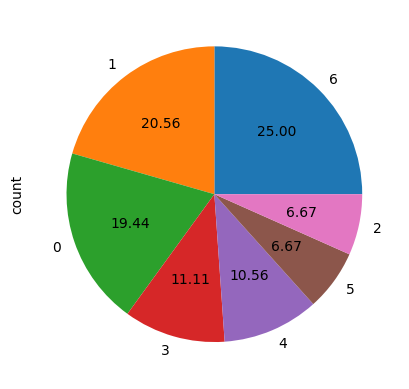

In [ ]:
new_df.Cluster.value_counts().plot.pie(autopct='%.2f')

In [ ]:
new_df.Cluster.value_counts()

Cluster
6    45
1    37
0    35
3    20
4    19
5    12
2    12
Name: count, dtype: int64

## 회귀 모델


*   다양한 모델 사용할 예정
*   모든 feature를 사용


In [ ]:
r_df = new_df.copy() # 복사, 원본 데이터 유지 위해 사용

In [ ]:
r_df.head()

,stem_length,leaf_cnt,stem_thick,ti_value,ec_value,ph_value,amount_value,growth_state
0,36.6,7.3,16.0,15.8,1.34,5.70,211.0,3
1,33.3,7.8,15.3,16.2,1.17,5.78,267.0,3
2,25.6,6.2,13.5,16.1,0.92,5.79,222.0,3
3,29.2,6.8,18.2,14.3,0.80,5.80,180.0,3
4,25.1,10.2,16.6,14.5,0.97,5.96,138.0,3


In [ ]:
r_df = r_df.drop(['Cluster'], axis=1)

### linear regression 모델 사용

In [ ]:
X = r_df[['stem_length','leaf_cnt','stem_thick']]
y = r_df['growth_state']

X.shape

(180, 3)

In [ ]:
from sklearn.linear_model import LinearRegression # 랜덤하게 잘라줌
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) # 70 : 30

In [ ]:
X_train.shape

(126, 3)

In [ ]:
X_test.shape

(54, 3)

In [ ]:
Ir = LinearRegression()

In [ ]:
Ir.fit(X_train, y_train) # 가중치, bias 계산 완료

LinearRegression()

In [ ]:
from __future__ import print_function
print('Ir.coef_ : ', Ir.coef_)
print('Ir.intercept_ : ', Ir.intercept_)

Ir.coef_ :  [-0.01199898  0.15062351  0.39280276]
Ir.intercept_ :  -3.7698258528738124


In [ ]:


print('훈련 데이터셋의 R2 : ', Ir.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', Ir.score(X_test, y_test))

훈련 데이터셋의 R2 :  0.7499752328726229
테스트 데이터셋의 R2 :  0.7712013098916012


### 릿지 회귀 모델 사용

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [ ]:

print('훈련 데이터셋의 R2 : ', ridge.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', ridge.score(X_test, y_test))

훈련 데이터셋의 R2 :  0.7499469242491946
테스트 데이터셋의 R2 :  0.7719631608863626


In [ ]:

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 데이터셋의 R2 : ', ridge10.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', ridge10.score(X_test, y_test))

훈련 데이터셋의 R2 :  0.7476269979569292
테스트 데이터셋의 R2 :  0.775371817059138


In [ ]:

ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print('훈련 데이터셋의 R2 : ', ridge001.score(X_train, y_train))
print('테스트 데이터셋의 R2 : ', ridge001.score(X_test, y_test))

훈련 데이터셋의 R2 :  0.7499752299747111
테스트 데이터셋의 R2 :  0.7712093898901439


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

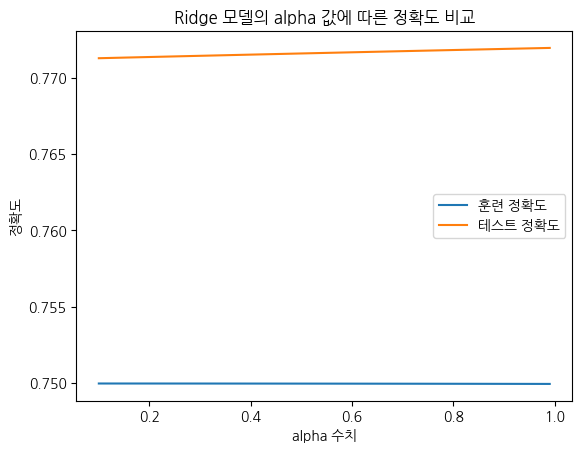

가장 높은 테스트 정확도: 0.7719559940914545, 해당 alpha 값: 0.9899999999999995


In [ ]:
import numpy as np

train_scores = []
test_scores = []

n_alpha_settings = np.arange(0.1,1.0,0.01)

for n_alpha in n_alpha_settings :

  ridge = Ridge(alpha= n_alpha)
  ridge.fit(X_train, y_train)

  train_scores.append(ridge.score(X_train, y_train))

  test_scores.append(ridge.score(X_test, y_test))

plt.figure(dpi=100)

plt.plot(n_alpha_settings, train_scores, label = '훈련 정확도')
plt.plot(n_alpha_settings, test_scores, label = '테스트 정확도')

plt.title('Ridge 모델의 alpha 값에 따른 정확도 비교')
plt.xlabel('alpha 수치')
plt.ylabel('정확도')
plt.legend()
plt.show()
best_alpha = n_alpha_settings[np.argmax(test_scores)]
best_test_accuracy = max(test_scores)
print(f"가장 높은 테스트 정확도: {best_test_accuracy}, 해당 alpha 값: {best_alpha}")

In [ ]:

feature_names = ['stem_length', 'leaf_cnt', 'stem_thick']

def predict_growth_state(new_input):
    new_input_array = np.array(new_input).reshape(1, -1)
    prediction = ridge.predict(new_input_array)
    return prediction

while True:
    try:
        new_input = []
        print(f"{len(feature_names)}개의 특성 값을 입력하세요:")

        for feature in feature_names:
            value = float(input(f"{feature}: "))
            new_input.append(value)

        prediction = predict_growth_state(new_input)
        print(f"예측된 성장 상태: {prediction[0]}")

    except ValueError:
        print("유효한 숫자를 입력해주세요.")
    except Exception as e:
        print(f"오류가 발생했습니다: {e}")

    cont = input("다른 데이터를 예측하시겠습니까? (y/n): ").strip().lower()
    if cont != 'y':
        break


3개의 특성 값을 입력하세요:
stem_length: 29.9
leaf_cnt: 6.5
stem_thick: 15.0
예측된 성장 상태: 27.002113224008447
다른 데이터를 예측하시겠습니까? (y/n): n


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=10000).fit(X_train_scaled, y_train)

print('훈련 데이터셋의 정확도: ', logreg.score(X_train_scaled, y_train))
print('테스트 데이터셋의 정확도: ', logreg.score(X_test_scaled, y_test))

def predict_growth_state(new_input):
    new_input_array = np.array(new_input).reshape(1, -1)
    new_input_scaled = scaler.transform(new_input_array)
    prediction = logreg.predict(new_input_scaled)
    return prediction

while True:
    try:
        new_input = []
        print(f"{len(feature_names)}개의 특성 값을 입력하세요:")

        for feature in feature_names:
            value = float(input(f"{feature}: "))
            new_input.append(value)

        prediction = predict_growth_state(new_input)
        print(f"예측된 성장 상태: {prediction[0]}")

    except ValueError:
        print("유효한 숫자를 입력해주세요.")
    except Exception as e:
        print(f"오류가 발생했습니다: {e}")

    cont = input("다른 데이터를 예측하시겠습니까? (y/n): ").strip().lower()
    if cont != 'y':
        break


훈련 데이터셋의 정확도:  0.5873015873015873
테스트 데이터셋의 정확도:  0.5370370370370371
3개의 특성 값을 입력하세요:
stem_length: 29.9
leaf_cnt: 6.5
stem_thick: 15.0
예측된 성장 상태: 7
다른 데이터를 예측하시겠습니까? (y/n): ㅛ


# 양액 추천 (농진청 데이터 기반)


*   x : stem_length	leaf_cnt	stem_thick	ti_value
*   y : ec_value	ph_value	amount_value (양액 정보들)



In [ ]:
import pandas as pd

In [ ]:
new_df = pd.read_csv('/content/f_new_file.csv')

In [ ]:
new_df.head()

In [ ]:
new_df = new_df.drop(['Cluster', 'growth_state'], axis=1)
new_df.head()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(new_df)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=new_df[['stem_length', 'leaf_cnt', 'stem_thick', 'ti_value']], ax=axes[0, 0])
sns.boxplot(data=new_df[['ec_value', 'ph_value']], ax=axes[0, 1])
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', ax=axes[1, 0])
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split

X = new_df[['stem_length', 'leaf_cnt', 'stem_thick', 'ti_value']]
y_ec = new_df['ec_value']
y_ph = new_df['ph_value']

X_train, X_test, y_ec_train, y_ec_test = train_test_split(X, y_ec, test_size=0.2, random_state=42)
X_train, X_test, y_ph_train, y_ph_test = train_test_split(X, y_ph, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

def evaluate_models(X_train, y_train):
    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        mse_scores = -scores
        print(f'{name} 평균 제곱근 오차 (MSE): {mse_scores.mean():.2f}')

print("EC 값 예측 모델 성능:")
evaluate_models(X_train, y_ec_train)

print("\nPH 값 예측 모델 성능:")
evaluate_models(X_train, y_ph_train)


EC 값 예측 모델 성능:
Linear Regression 평균 제곱근 오차 (MSE): 0.03
Ridge Regression 평균 제곱근 오차 (MSE): 0.03
Lasso Regression 평균 제곱근 오차 (MSE): 0.04
Random Forest 평균 제곱근 오차 (MSE): 0.03
Gradient Boosting 평균 제곱근 오차 (MSE): 0.03

PH 값 예측 모델 성능:
Linear Regression 평균 제곱근 오차 (MSE): 0.06
Ridge Regression 평균 제곱근 오차 (MSE): 0.06
Lasso Regression 평균 제곱근 오차 (MSE): 0.06
Random Forest 평균 제곱근 오차 (MSE): 0.05
Gradient Boosting 평균 제곱근 오차 (MSE): 0.07


In [ ]:
from sklearn.metrics import mean_squared_error

best_model_ec = RandomForestRegressor()
best_model_ph = RandomForestRegressor()

best_model_ec.fit(X_train, y_ec_train)
best_model_ph.fit(X_train, y_ph_train)

y_ec_pred = best_model_ec.predict(X_test)
y_ph_pred = best_model_ph.predict(X_test)

mse_ec = mean_squared_error(y_ec_test, y_ec_pred)
mse_ph = mean_squared_error(y_ph_test, y_ph_pred)

print('EC 값 예측 모델의 평균 제곱근 오차 (MSE):', mse_ec)
print('PH 값 예측 모델의 평균 제곱근 오차 (MSE):', mse_ph)

EC 값 예측 모델의 평균 제곱근 오차 (MSE): 0.03951045277777779
PH 값 예측 모델의 평균 제곱근 오차 (MSE): 0.07494527055555569


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = new_df[['stem_length', 'leaf_cnt', 'stem_thick', 'ti_value']]
y_ec = new_df['ec_value']
y_ph = new_df['ph_value']

X_train, X_test, y_ec_train, y_ec_test = train_test_split(X, y_ec, test_size=0.2, random_state=42)
X_train, X_test, y_ph_train, y_ph_test = train_test_split(X, y_ph, test_size=0.2, random_state=42)

best_model_ec = GradientBoostingRegressor()
best_model_ph = GradientBoostingRegressor()

best_model_ec.fit(X_train, y_ec_train)
best_model_ph.fit(X_train, y_ph_train)

def recommend_nutrient(stem_length, leaf_cnt, stem_thick, ti_value):
    input_data = pd.DataFrame([[stem_length, leaf_cnt, stem_thick, ti_value]], columns=['stem_length', 'leaf_cnt', 'stem_thick', 'ti_value'])
    ec_value = best_model_ec.predict(input_data)[0]
    ph_value = best_model_ph.predict(input_data)[0]

    print("추천 양액 정보:")
    print(f"  EC 값: {ec_value:.2f} dS/m")
    print(f"  pH 값: {ph_value:.2f}")

while True:
    try:
        stem_length = float(input("초장 (cm): "))
        leaf_cnt = int(input("엽수 (개): "))
        stem_thick = float(input("관부직경 (mm): "))
        ti_value = float(input("일일 평균온도 (℃): "))

        recommend_nutrient(stem_length, leaf_cnt, stem_thick, ti_value)

    except ValueError:
        print("유효한 숫자를 입력해주세요.")
    except Exception as e:
        print(f"오류가 발생했습니다: {e}")

    cont = input("다른 데이터를 입력하시겠습니까? (y/n): ").strip().lower()
    if cont != 'y':
        break


초장 (cm): 17
엽수 (개): 5
관부직경 (mm): 12
일일 평균온도 (℃): 17
추천 양액 정보:
  EC 값: 1.07 dS/m
  pH 값: 5.83
다른 데이터를 입력하시겠습니까? (y/n): n


### api 연동

In [ ]:
import pickle
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "ec_model": best_model_ec,
    "ph_model": best_model_ph
}

with open('best_models.pkl', 'wb') as file:
    pickle.dump(models, file)


In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)

with open('best_models.pkl', 'rb') as file:
    models = pickle.load(file)
    ec_model = models['ec_model']
    ph_model = models['ph_model']

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    stem_length = data['stem_length']
    leaf_cnt = data['leaf_cnt']
    stem_thick = data['stem_thick']
    ti_value = data['ti_value']

    input_data = pd.DataFrame([[stem_length, leaf_cnt, stem_thick, ti_value]],
                              columns=['stem_length', 'leaf_cnt', 'stem_thick', 'ti_value'])

    ec_value = ec_model.predict(input_data)[0]
    ph_value = ph_model.predict(input_data)[0]

    return jsonify({
        'ec_value': ec_value,
        'ph_value': ph_value
    })

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
